# PHYS 3120: Homework 6, Michelle Ukiwe

## Fourier filtering and smoothing 

On Canvas, you can find the file called dow.txt, containing the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, a measure of average prices in the US stock market. Write a program to do the following:

(a) Read in the data from dow.txt and plot them on a graph.

Text(0, 0.5, 'daily closing value')

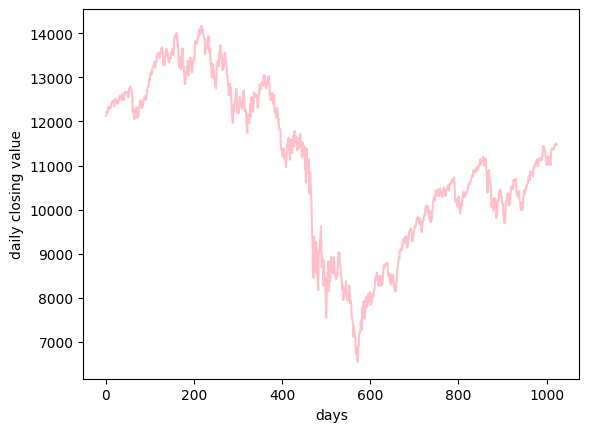

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#loading in the text file as dow
dow = np.loadtxt("dow.txt")
#plotting values in pink using pyplot
plt.plot(dow, color='pink')
plt.xlabel("days")
plt.ylabel("daily closing value")

b) Calculate the coefficients of the discrete Fourier transform of the data using
the function rfft from the numpy.fft module, which produces an array of 0.5N + 1 complex
numbers.

In [19]:
coefficients = np.fft.rfft(dow)

coe0 = coefficients

len(coefficients)

513

(c) Now set all but the first 10% of the elements of this array to zero (that is, set
the last 90% to zero but keep the values of the first 10%)

In [20]:
#setting the last 462 elements in the array (90%) equal to 0
coe0[-462:] = 0
coe0

array([ 1.12839039e+07+0.00000000e+00j,  6.84127740e+05-9.55087519e+05j,
       -4.19226205e+05+9.29089562e+04j,  7.41901498e+04-2.73812250e+05j,
       -3.51856811e+04+7.23658613e+04j,  1.11482643e+05-3.14779807e+04j,
        2.16752824e+04-2.45751549e+04j,  1.11224416e+04+2.47975704e+04j,
        3.11884665e+04+2.27868210e+04j,  7.38523102e+03-3.21233427e+04j,
       -3.39615972e+04-1.07833052e+05j, -1.23569569e+04+2.73171276e+04j,
        2.13837315e+04-9.16684147e+04j, -4.32441725e+04+9.92294540e+04j,
       -3.55753518e+03-2.54972743e+04j, -3.04367677e+04-1.72551151e+04j,
       -9.31799610e+03-2.49297658e+04j, -9.35033325e+03-1.75612302e+04j,
        1.17418062e+04+2.09235370e+04j,  4.22549031e+04-2.38143067e+03j,
        1.35294835e+04-3.06720066e+04j,  4.06499470e+03-2.87140744e+04j,
       -1.56146318e+04+2.24811825e+04j,  1.35756353e+04-1.28123867e+04j,
        1.20484888e+04+3.50866363e+03j, -1.55111478e+04-1.70617041e+04j,
        8.98307189e+03+4.49546331e+03j,  4.42970647

(d) Calculate the inverse Fourier transfer of the resulting array, zeros and all, using the function irfft, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both appear on the graph. Comment on what you observe. What is happening when you set the Fourier coefficients to zero?

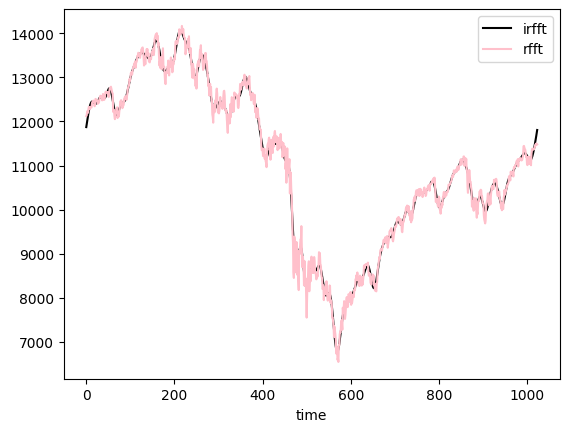

In [21]:
#inverse fourier transform of the coefficients
irfft = np.fft.irfft(coe0)
plt.xlabel("days")
#plotting both the fourier transform and inverse fourier on the same graph
plt.plot(irfft, label="irfft", color='black')
plt.plot(dow, label="rfft", color='pink')
plt.legend()

#when the fourier coefficients are set to zero, there are fewer extreme increases or decreases in the data. 

(e) Modify your program so that it sets all but the first 2% of the coefficients to
zero and run it again. What do you see?

In [22]:
coe00 = coe0
#setting the last 503 elements in the array (98%) equal to 0
coe00[-503:] = 0
coe00

array([ 1.12839039e+07     +0.j        ,  6.84127740e+05-955087.51914779j,
       -4.19226205e+05 +92908.95615825j,  7.41901498e+04-273812.25003958j,
       -3.51856811e+04 +72365.86128838j,  1.11482643e+05 -31477.9806891j ,
        2.16752824e+04 -24575.15492195j,  1.11224416e+04 +24797.57044774j,
        3.11884665e+04 +22786.82096782j,  7.38523102e+03 -32123.34266319j,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00     +0.j        ,  0.00000000e+00     +0.j        ,
        0.00000000e+00   

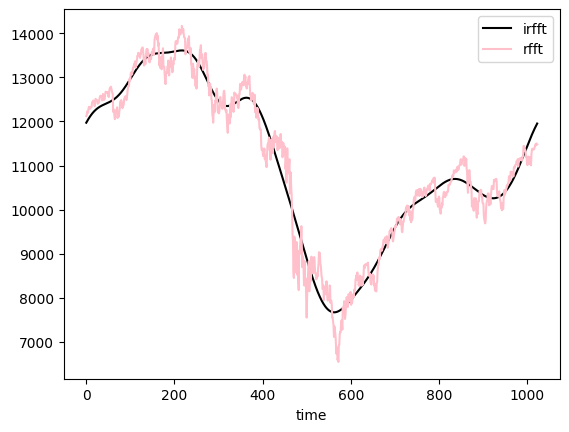

In [23]:
#inverse fourier transform of the coefficients array with 98% zeros
irfft = np.fft.irfft(coe00)
plt.xlabel("time")
#plotted against the original dataset
plt.plot(irfft, label="irfft", color='black')
plt.plot(dow, label="rfft", color='pink')
plt.legend()

#the data is much smoother, but to an extreme extent. it disregards some of important drops and rises in the dow.

For full credit, include your program with comments for parts (a)-(e), along the plot of
the original data in part (a), the coefficients of the discrete FFT in part (b), the plot of the
modified data, comparing it with the original data in part (d), and lastly your plot in part
(e), similar to part (d).

## The Lotka-Volterra equations
The Lotka-
Volterra equations are a mathematical model of predator-prey interactions between biological
species. let two variables x and y be proportional to the size of the populations of two species,
traditionally called rabbits (the prey) and foxes (the predators). You could think of x and
y being the population in thousands. Strictly the only allowed values of x and y would be
multiples of 0.001 since you can only have whole numbers of animals! But 0.001 is a pretty
close spacing of values, so it’s a decent approximation to treat x and y as continuous real
numbers so long as neither gets very close to zero.


In the Lotka-Volterra model, the rabbits reproduce at a rate proportional to their pop-
ulation, but are eaten by the foxes at a rate proportional to both their own population and
the population of foxes

\begin{equation}
\frac{dx}{dt} = \alpha x - \beta x y
\end{equation}

where $\alpha$ and $\beta$ are constants. At the same time, the foxes reproduce at a rate proportional
to the rate at which they eat rabbits—because they need food to grow and reproduce—but
also die of old age at a rate proportional to their own population:

\begin{equation}
\frac{dy}{dt} = \gamma xy - \delta x y
\end{equation}

where $\gamma$ and $\delta$ are also constants



(a) (20 points) Write a program to solve these equations using the fourth-order Runge-
Kutta method for the case (α = 1, β = γ = 1/2, δ = 2), starting from the initial condition
x = y = 2. Have the program make a graph showing both x and y as a function of time on
the same axes from t = 0 → 30.

_Hint_: Notice that the differential equations in this case do not depend explicitly on time
t—in vector notation, the right-hand side of each equation is a function f (r) with no t
dependence. You may nonetheless find it convenient to define a Python function f(r,t)
including the time variable, so that your program takes the same form as programs given
earlier in this chapter. You don’t have to do it that way, but it can avoid some confusion.
Several of the following exercises have a similar lack of explicit time-dependence

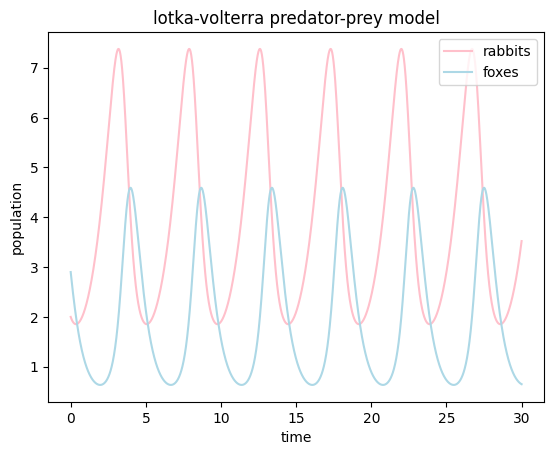

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#setting up the constants
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

#the initial populations of the rabbits and foxes
xzero = 2.0
yzero = 2.9

#setting up the end and beginning time
tzero = 0
tend = 30
#the time step
h = 0.01
n = int(tend/h)

#derivative function to return the rates of change according to the orignal equation
def f(r,t):
    x,y = r
    dxdt = alpha*x - beta*x*y
    dydt = gamma*x*y - delta*y
    return np.array([dxdt, dydt])

#creating arrays to store population and time
tvalues = np.linspace(tzero, tend, n+1)
xvalues = np.zeros(n+1)
yvalues = np.zeros(n+1)

#the inital values of population for both foxes and rabbits
xvalues[0] = xzero
yvalues[0] = yzero

r = np.array([xzero, yzero])


#runge kutta fourth order loop
for i in range(n):
    t = tvalues[i]
    #intermediate slops
    k1 = h*f(r, t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)

    r += (k1 + 2*k2 + 2*k3 + k4)/6
    #storing these new x and y values
    xvalues[i+1] = r[0]
    yvalues[i+1] = r[1]

#displaying values on graph
plt.plot(tvalues, xvalues, label='rabbits', color='pink')
plt.plot(tvalues, yvalues, label='foxes', color='lightblue')
#x label is time
plt.xlabel('time')
#versus population
plt.ylabel('population')
#title of graph
plt.title('lotka-volterra predator-prey model')
#creating a legend for the graph
plt.legend()


(b) (5 points) Describe in words what is going on in the system, in terms of prey and
predators.

__Answer to part b__  this shows how the rabbit and fox populations evolve over time. The population of rabbits rises when foxes decrease, and vice versa

For full credit, include your program with comments, along with your plot of x and
y as a function of time for part (a), supplemented with your interpretation of the result in
part (b).
2


### The Lorenz Equations

One of the most celebrated
sets of differential equations in physics are the Lorenz equations:

\begin{equation}
\frac{dx}{dt} = \sigma (y-x), \frac{dy}{dt} = rx-y-xz, \frac{dz}{dt}=xy-bz
\end{equation}

where $\sigma$, $r$, and $b$ are constants

These equations were first studied by Edward Lorenz in 1963, who derived them from a
simplified model of weather patterns. The reason for their frame is that they were one of the
first incontrovertible examples of deterministic chaos, the occurrence of apparently random
motion even though there is no randomness built into the equations

(a) (20 points) Write a program to solve the Lorenz equations with the Runge-Kutta 4th
order method for the case (σ = 10, r = 28, b = 8/3) in the range from t = 0 → 50 with
initial conditions (x, y, z) = (0, 1, 0). Have your program plot y as a function of time. Note
the unpredictable nature of the motion.

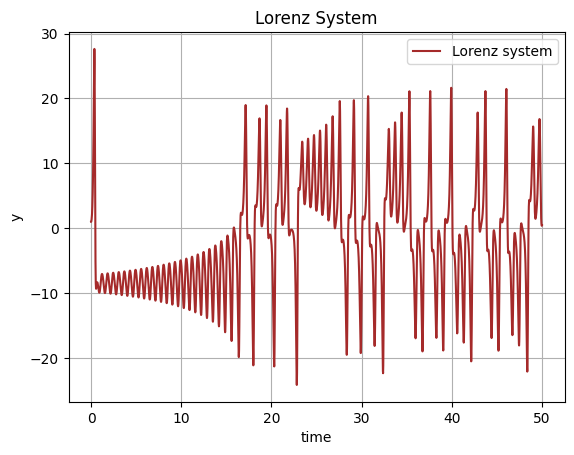

In [23]:
#setting up the constants
sigma = 10
r = 28
b = 8/3

#setting up end and beginning time. 
tzero = 0.0
tend = 50.0
#step size
h = 0.01
n = int(tend/h)

#initial conditions as per the problem
xzero = 0.0
yzero = 1.0
zzero = 0.0

#defining a function for the derivative using the equations giving
def f(value,t):
    x,y,z = value
    dxdt = sigma*(y-x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    #will return an array of the derivatives
    return np.array([dxdt, dydt, dzdt])

#creating arrays to store values
tvalues = np.linspace(tzero, tend, n+1)
xvalues = np.zeros(n+1)
yvalues = np.zeros(n+1)
zvalues = np.zeros(n+1)

#the initial values
xvalues[0] = xzero
yvalues[0] = yzero
zvalues[0] = zzero

value = np.array([xzero, yzero, zzero])
#runge kutta fourth order loop
for i in range(n):
    t = tvalues[i]
    #intermediate steps
    k1 = h * f(value, t)
    k2 = h * f(value + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(value + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(value + k3, t + h)
    
    value += (k1 + 2*k2 + 2*k3 + k4) / 6
    #storing values
    xvalues[i+1] = value[0]
    yvalues[i+1] = value[1]
    zvalues[i+1] = value[2]

#graphing values
plt.plot(tvalues, yvalues, label='Lorenz system', color='brown')
plt.xlabel('time')
plt.ylabel('y')
plt.title('Lorenz System')
plt.legend()

(b) (5 points) Modify your program to produce a plot of z against x. You should see a
picture of the famous “strange attractor” of the Lorenz equations, a lopsided butterfly-shaped plot that never repeats itself.


Text(0.5, 1.0, 'lorenz strange attractor')

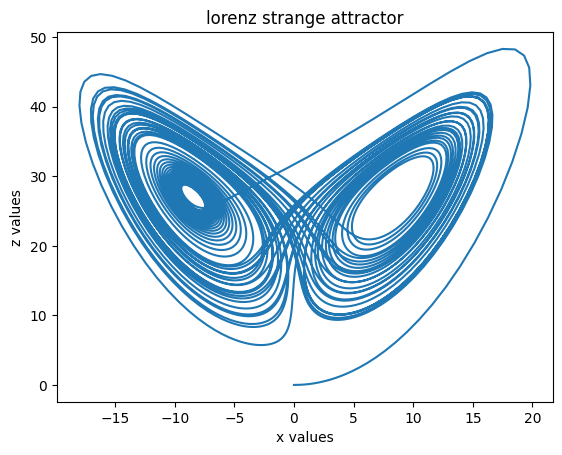

In [26]:
import matplotlib.pyplot as plt

#plotting x values against z values
plt.plot(xvalues, zvalues)
#labelling axes
plt.xlabel("x values")
plt.ylabel("z values")
plt.title("lorenz strange attractor")

### Application question (15 points)

In a couple of paragraphs (about 250 words),
describe a time-dependent physical system that interests you, along with any quantities
or ODE(s) that describe its state and evolution, respectively, also answering the following
questions. You do not have to provide any code.
(a) Pick one quantity that is calculated through integration. Which integration method
would you use and why?
(b) For the ODE(s), which method is best suited to evolve the system forward in time?
Justify your choice by considering the necessary accuracy and computational speed.


A time dependent physical system of interest is a particle in an infinite potential well described by the time dependent Schrodinger equation.

\begin{equation}
i\hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x,t)}{\partial x^2} + V(x)\psi(x,t)
\end{equation}

a. A quantity that requires integration is the probability of finding a particle in a specific region of the well. Probability is calculated through the following equation, with the summation of all probabilties having to sum to 1.

\begin{equation}
P = \int_a^b |\psi(x,t)|^2 dx
\end{equation}

I would use Simpsons rule for its accuracy for trapezoidal data and its ability to accomodate fluctations in the wavefunction.

b. I would use Crank-Nicholson to evolve the system forward in time. It provides the necessary accuracy of conserving probability needing to sum to 1 and is computationally efficient. Additionally, is useful for simulations over long times. Other numerical methods such as RK4 may not conserve probabiltiy. 

